# Análisis Exploratorio de Datos de Internet - Telecomunicaciones

## INTRODUCCIÓN

Dentro de las telecomunicaciones, se busca realizar un análisis de los accesos a servicios de Internet en Argentina según diversas variables.

El presente informe, busca realizar en primer lugar el proceso de ETL (extracción, transformación y carga) necesario para el correcto manejo de los datos. A partir de esto, se realiza el análisis exploratorio de los datos de manera completa que permita reconocer el comportamiento de este sector a nivel nacional.

Los datos fueron obtenidos de la página del Ente Nacional de Comunicaciones (ENACOM) de Argentina. La ENACOM es el organismo regulador de las telecomunicaciones en Argentina, responsable de la regulación y control de los servicios de comunicación en el país.
Se utiliza el archivo de Excel llamado "Internet" el cual contiene un total de 15 hojas.


De estas 15 hojas, se decide filtrar datos y trabajar con las hojas:

- Accesos por velocidad
- Accesos por tecnología
- Penetración - población
- Penetración - hogares
- Penetración - totales
- Ingresos

Esta decisión se toma a partir de que éstas hojas, en parte, resumen el contenido del resto y por otro lado, debido a la información necesaria para el posterior cálculo de los KPIs propuestos.

## DESARROLLO

### Importación de librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Esta librería evita la aparición de mensajes de ""warnings"".
import warnings
warnings.filterwarnings('ignore')

### Carga de datos

Se cargan las diferentes hojas del archivo en un dataframe diferente.

In [3]:
# Cargar el archivo "Internet.xlsx"
file_path = 'Internet.xlsx'

# Cargar las hojas seleccionadas
df_accesos_por_v = pd.read_excel(file_path, sheet_name='Accesos por velocidad') 
df_accesos_por_t = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')
df_penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')
df_penetracion_poblacion = pd.read_excel(file_path, sheet_name='Penetración-poblacion')
df_penetracion_totales = pd.read_excel(file_path, sheet_name='Penetracion-totales') 
df_ingresos = pd.read_excel(file_path, sheet_name='Ingresos')


In [4]:
# Se visualizan los datos de cada df
df_accesos_por_v.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0
1,2024,4,Capital Federal,516.0,4544.0,26409.0,48083.0,33925.0,5829.0,1355061.0,0.0,1474367.0
2,2024,4,Catamarca,71.0,209.0,3065.0,3734.0,4423.0,1827.0,61181.0,77.0,74587.0
3,2024,4,Chaco,236.0,477.0,14811.0,10361.0,6247.0,5729.0,105485.0,4040.0,147386.0
4,2024,4,Chubut,111.0,1088.0,44276.0,31402.0,22843.0,20196.0,33665.0,16589.0,170170.0


In [5]:
df_accesos_por_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


In [6]:
df_accesos_por_t.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


In [7]:
df_accesos_por_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB


In [8]:
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96


In [9]:
df_penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [10]:
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04


In [11]:
df_penetracion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [12]:
df_penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022


In [13]:
df_penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [14]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2023,4,1.673760e+08,Oct-Dic 2023
1,2023,3,1.331066e+08,Jul-Sept 2023
2,2023,2,1.180603e+08,Jun-Mar 2023
3,2033,1,1.041350e+08,Ene-Mar 2023
4,2022,4,7.244348e+07,Oct-Dic 2022


In [15]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


### Transformaciones

Al observar los datos, se observan algunas inconsistencias. Por un lado, en el df_accesos_por_v, se detecta información del 4to trimestre del año 2024 y la falta de la información del 4to trimestre del año 2023, por lo que se supone un error de tipeo en la carga de los datos. 

A partir de esto, se decide revisar los datos asociados al año en todos los dataframes y realizar las transformaciones necesarias. Por ejemplo, los tipos de datos en año y trimestre en el df_acceso_por_t.

In [16]:
# Reemplazar el valor 2024 con 2023 en la columna "Año"
df_accesos_por_v.loc[df_accesos_por_v['Año'] == 2024, 'Año'] = 2023

# Verificar que los cambios se han aplicado
print(df_accesos_por_v['Año'].value_counts())


Año
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64


In [17]:
# Verificar que todos los valores 2024 han sido reemplazados por 2023
print(df_accesos_por_v[df_accesos_por_v['Año'] == 2024])

Empty DataFrame
Columns: [Año, Trimestre, Provincia, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS, Total]
Index: []


Se procede a revisar los valores únicos en la columna "Año" de todos los dataframes, ya que esta será la columna más propicia para posteriormente vincular los datos. Para esto, se genera una función aplicable a todos y se revisan los resultados.

In [18]:
# Función para revisar valores únicos en la columna "Año" de todos los dataframes

def revisar_valores_unicos_anos(dataframes):
    for name, df in dataframes.items():
        print(f"Valores únicos en 'Año' del dataframe {name}: {df['Año'].unique()}")

# Lista de tus dataframes en un diccionario
dataframes = {
    'df_accesos_por_v': df_accesos_por_v,
    'df_accesos_por_t': df_accesos_por_t,
    'df_penetracion_hogares': df_penetracion_hogares,
    'df_penetracion_poblacion': df_penetracion_poblacion,
    'df_penetracion_totales': df_penetracion_totales,
    'df_ingresos': df_ingresos
}


In [19]:
revisar_valores_unicos_anos(dataframes)

Valores únicos en 'Año' del dataframe df_accesos_por_v: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_accesos_por_t: [2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']
Valores únicos en 'Año' del dataframe df_penetracion_hogares: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_penetracion_poblacion: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_penetracion_totales: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_ingresos: [2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Se observan inconsistencias en los valores del df_accesos_por_t, se puede suponer que debido a estas inconsistencias el tipo de datos que maneja esta columna es object y no int como en el resto de los datos. Por otro lado, se observa la presencia del años "2033" en el df_ingresos, lo que claramente es un error de tipeo, por lo que se modifica este valor por 2023.


In [20]:
# Se eliminan los registros con valores nan y "*" ya que no poseen datos.
df_accesos_por_t = df_accesos_por_t.dropna(subset=['Año'])
df_accesos_por_t = df_accesos_por_t[df_accesos_por_t['Año'] != '*'] 

In [21]:
# Se modifican los valores "2019 *" a 2019
df_accesos_por_t['Año'] = df_accesos_por_t['Año'].replace('2019 *', '2019')

In [22]:
# Verificar cambios
print(df_accesos_por_t['Año'].unique())


[2023 2022 2021 2020 2019 '2019' 2018 2017 2016 2015 2014]


In [23]:
# Se modifica "2033" por "2023" en el df_ingresos
df_ingresos.loc[df_ingresos['Año'] == 2033, 'Año'] = 2023

Se procede a revisar los valores únicos en la columna "Trimestre" de todos los dataframes, ya que se observan algunas inconsistencias en el df_acceso_por_t a corregir.

In [24]:
# Función para revisar valores únicos en la columna "Trimestre" de todos los dataframes

def revisar_valores_unicos_trim(dataframes):
    for name, df in dataframes.items():
        print(f"Valores únicos en 'Trimestre' del dataframe {name}: {df['Trimestre'].unique()}")


In [25]:
revisar_valores_unicos_trim(dataframes)

Valores únicos en 'Trimestre' del dataframe df_accesos_por_v: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_accesos_por_t: [4 3 2 1 '3 *' '2 *' '1 *' nan
 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']
Valores únicos en 'Trimestre' del dataframe df_penetracion_hogares: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_penetracion_poblacion: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_penetracion_totales: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_ingresos: [4 3 2 1]


Se corrigen los valores inconsistentes

In [26]:
# Se reemplazan los valores '3 *' '2 *' '1 *' por 3, 2 y 1 respectivamente.
replace_dict = {'3 *': '3', '2 *': '2', '1 *': '1'}
df_accesos_por_t['Trimestre'] = df_accesos_por_t['Trimestre'].replace(replace_dict)

** Cabe destacar que los valores de los trimestres 1, 2 y 3 del año 2019 en el df_accesos_por_t, los cuales corresponden a datos provinciales, no coinciden a nivel nacional, ya que se reincorporó información que no contiene apertura a nivel geográfico. **

Se modifica el tipo de datos de las columnas "Año" y "Trimestre" de df_acceso_por_t de object a int.

In [27]:
# Convertir 'Año' a un tipo de dato numérico
df_accesos_por_t['Año'] = df_accesos_por_t['Año'].astype(int)

In [28]:
# Convertir 'Trimestre' a un tipo de dato numérico
df_accesos_por_t['Trimestre'] = df_accesos_por_t['Trimestre'].astype(int)

Se verifican las correcciones nuevamente con las funciones de valores unicos

In [29]:
revisar_valores_unicos_anos(dataframes)

Valores únicos en 'Año' del dataframe df_accesos_por_v: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_accesos_por_t: [2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014 nan '*']
Valores únicos en 'Año' del dataframe df_penetracion_hogares: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_penetracion_poblacion: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_penetracion_totales: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos en 'Año' del dataframe df_ingresos: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [30]:
revisar_valores_unicos_trim(dataframes)

Valores únicos en 'Trimestre' del dataframe df_accesos_por_v: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_accesos_por_t: [4 3 2 1 '3 *' '2 *' '1 *' nan
 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']
Valores únicos en 'Trimestre' del dataframe df_penetracion_hogares: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_penetracion_poblacion: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_penetracion_totales: [4 3 2 1]
Valores únicos en 'Trimestre' del dataframe df_ingresos: [4 3 2 1]


### Valores faltantes

Como parte del análisis exploratorio de datos se debe revisar si en los dataframes, existen valores faltantes. Para esto, se revisa cada caso en particular.

In [31]:
df_accesos_por_t.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [32]:
df_accesos_por_v.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [33]:
# Se rellenan los nulos con 0
df_accesos_por_v = df_accesos_por_v.fillna(0)
# se verifica nuevamente la presencia de nulos
df_accesos_por_v.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

Sólo se observan nulos en la columna "OTROS" del df_accesos_por_v. Se deciden rellenar estos nulos con 0, ya que este valor no modifica la sumatoria de la columna "Total" y se mantiene coherente con el resto de los datos.

In [34]:
df_penetracion_hogares.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [35]:
df_penetracion_poblacion.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [36]:
df_penetracion_totales.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [37]:
df_ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

### Valores duplicados

Se realiza una función para aplicar a los distintos dataframes, y se corrobora que no existen valores duplicados.

In [38]:
# Función para revisar valores duplicados en todos los dataframes

def revisar_valores_duplicados(dataframes):
    for name, df in dataframes.items():
        duplicados = df.duplicated().sum()
        print(f"Valores duplicados en el dataframe {name}: {duplicados}")

In [39]:
revisar_valores_duplicados(dataframes)

Valores duplicados en el dataframe df_accesos_por_v: 0
Valores duplicados en el dataframe df_accesos_por_t: 0
Valores duplicados en el dataframe df_penetracion_hogares: 0
Valores duplicados en el dataframe df_penetracion_poblacion: 0
Valores duplicados en el dataframe df_penetracion_totales: 0
Valores duplicados en el dataframe df_ingresos: 0


### Presencia de outliers y análisis de gráficas

En primer lugar se observan las estadísticas descriptivas de cada uno de los dataframes y algunos gráficos que puedan brindar información.

**df_accesos_por_v**

In [40]:
df_accesos_por_v.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000,960.000000,9.600000e+02,960.000000,9.600000e+02
mean,2018.500000,2.500000,1986.276042,9291.107292,1.371885e+05,38112.431250,37303.288542,20197.090625,1.098851e+05,6043.608333,3.600074e+05
std,2.873778,1.118617,12889.165297,21018.938200,3.281748e+05,64565.358974,89536.515407,70534.758485,4.347858e+05,14503.710948,7.740852e+05
min,2014.000000,1.000000,6.000000,0.000000,1.483000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,40.750000,347.250000,2.451150e+04,3581.000000,2127.500000,36.750000,1.075000e+01,0.000000,5.882400e+04
50%,2018.500000,2.500000,107.000000,2263.500000,4.425400e+04,12913.500000,10082.000000,1391.500000,2.418500e+03,58.000000,1.097050e+05
75%,2021.000000,3.250000,468.000000,7227.500000,8.439500e+04,40126.000000,26436.000000,9858.750000,3.533225e+04,6485.250000,1.880792e+05
max,2023.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.042646e+06,122762.000000,5.011620e+06


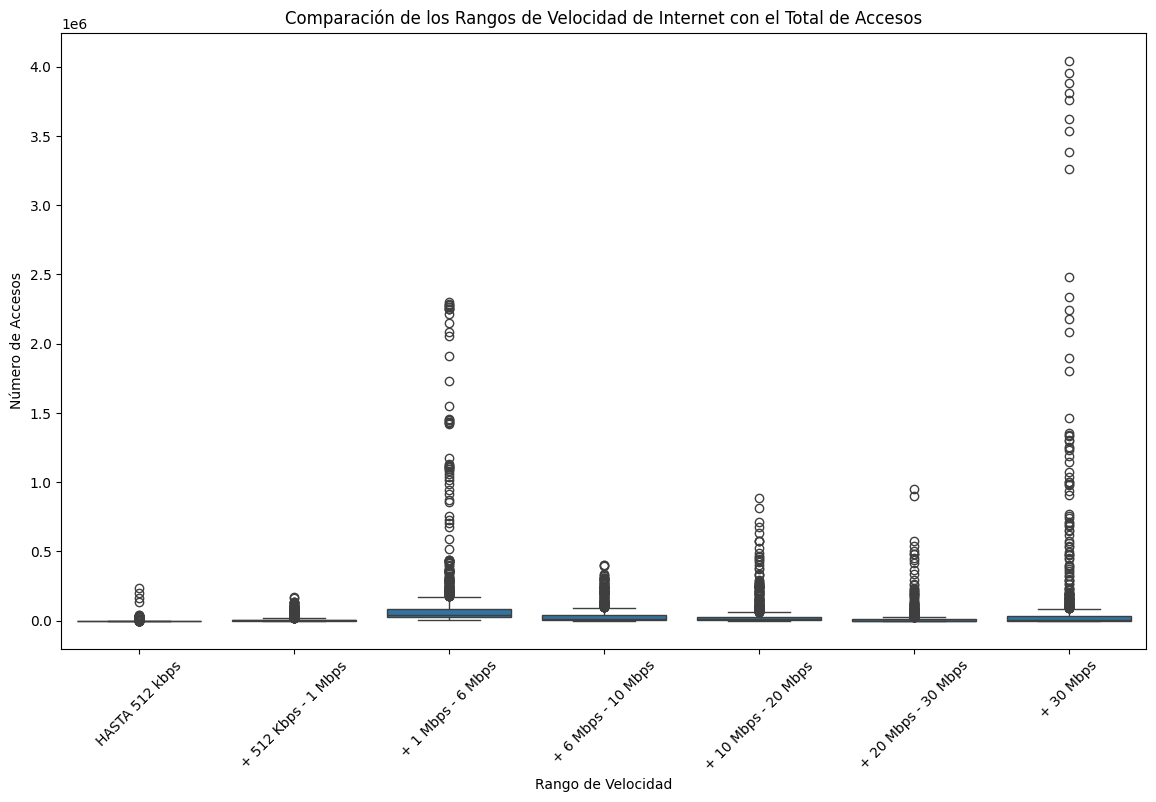

In [41]:
# BOXPLOT DE TOTAL DE ACCESOS POR RANGOS DE VELOCIDAD 

# Primero, creamos un DataFrame con las columnas necesarias para el diagrama de caja
# Seleccionamos las columnas de interés y "Total"
data_to_plot = df_accesos_por_v[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                                 '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                                 '+ 30 Mbps', 'Total']]

# Convertimos el DataFrame a un formato "largo" para que sea compatible con seaborn
data_melted = data_to_plot.melt(id_vars=['Total'], 
                                var_name='Rango de Velocidad', 
                                value_name='Accesos')

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crea el diagrama de caja
sns.boxplot(x='Rango de Velocidad', y='Accesos', data=data_melted)

# Añade títulos y etiquetas
plt.title('Comparación de los Rangos de Velocidad de Internet con el Total de Accesos')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Número de Accesos')

# Rotea las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()

Si bien con respecto a la cantidad de accesos por rango de velocidad se observa la presencia de outliers para todos los rangos, se observa que hay un mayor numero de acceso en los rangos de velocidad "+ 1 Mbps - 6 Mbps" y en "+ 30 Mbps".

Por lo tanto, tenemos dos grupos predominantes de accesos, aquellos de velocidades bajas y aquellos de velocidades muy altas.

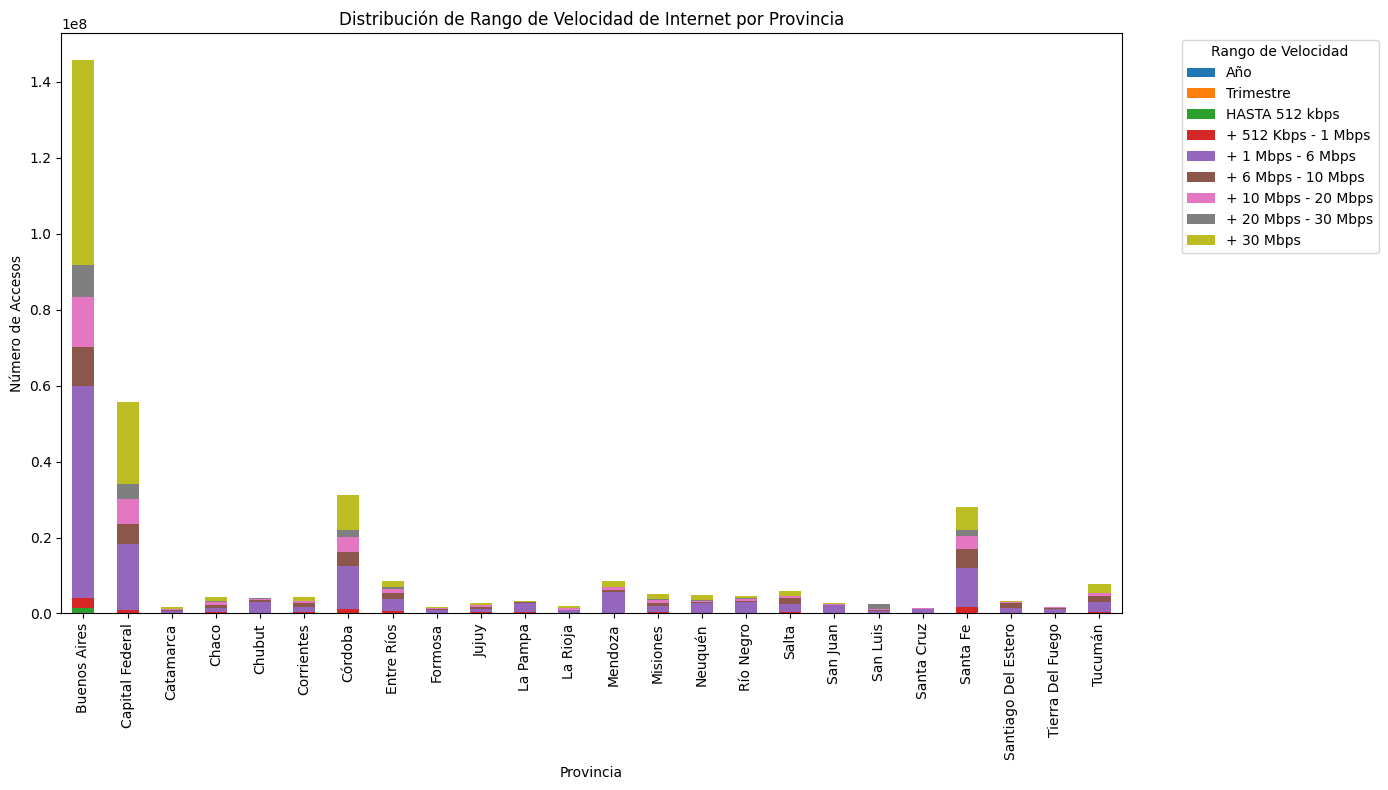

In [42]:
# GRÁFICO DE BARRAS APILADAS CON DISTRIBUCIÓN DE RANGO DE VELOCIDAD DE INTERNET POR PROVINCIA

# Copia del dataframe original para evitar modificaciones
df_copy = df_accesos_por_v.copy()

# Establecer el índice sin modificar el dataframe original
df_copy.set_index(['Provincia', 'Año', 'Trimestre'], inplace=True)

# Seleccionar las columnas de interés para el gráfico en la copia
df_rangos = df_copy[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                     '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                     '+ 30 Mbps']].reset_index()

# Agrupar por provincia y sumar los accesos en cada rango de velocidad
df_grouped = df_rangos.groupby('Provincia').sum()

# Crear el gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribución de Rango de Velocidad de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.legend(title='Rango de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Se observa la mayor cantidad de accesos en la provincia de Buenos Aires y en Capital Federal, predominando en ambos las velocidades "+ 1 Mbps - 6 Mbps" y en "+ 30 Mbps", lo cual es consecuente con lo observado en el gráfico anterior, donde dichas velocidades presentan valores anómalos en la cantidad de accesos. 

Por lo tanto, los outliers observados en el primer gráfico, posiblemente se deban a que tanto Buenos Aires como Capital Federal, concentran mayor cantidad de población que adquieren dichos servicios. 

Por otro lado, se observa que provincias ubicadas en latitudes extremas como Catamarca, Formosa, Santa Cruz, Tierra del Fuego, entre otras presentan menos cantidad de accesos. Esto puede deberse a mayor dificultad para hacer llegar la infraestructura necesaria a los extremos del país; así como tambien a menor poder adquisitivo en el caso de provincias ubicadas en el norte.

**df_accesos_por_t**

In [43]:
df_accesos_por_t.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,960.000000,960.000000,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02
mean,2018.500000,2.500000,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.615411e+05
std,2.873778,1.118617,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.778954e+05
min,2014.000000,1.000000,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.255700e+04
25%,2016.000000,1.750000,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.900025e+04
50%,2018.500000,2.500000,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.111385e+05
75%,2021.000000,3.250000,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883518e+05
max,2023.000000,4.000000,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.011620e+06


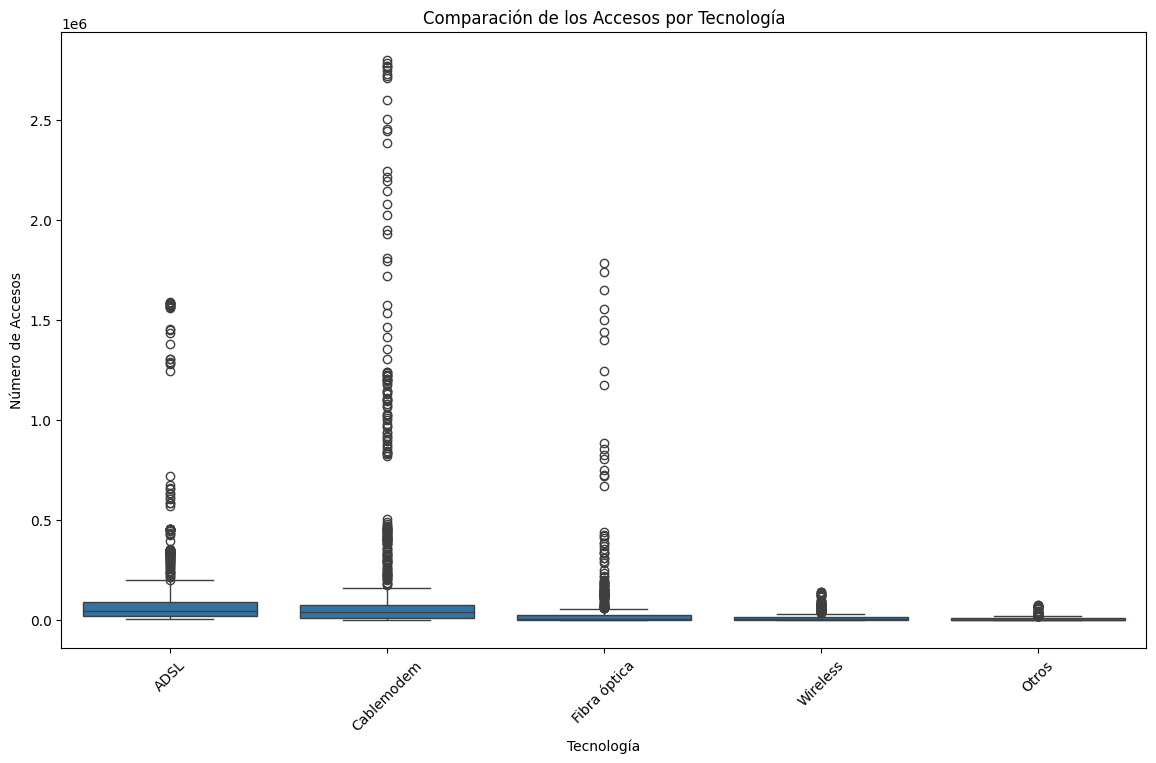

In [44]:
## BOXPLOT DE TOTAL DE ACCESOS POR TECNOLOGÍAS

# Primero, creamos un DataFrame con las columnas necesarias para el diagrama de caja
# Seleccionamos solo las columnas de interés: las tecnologías
data_to_plot = df_accesos_por_t[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

# Convertimos el DataFrame a un formato "largo" para que sea compatible con seaborn
data_melted = data_to_plot.melt(var_name='Tecnología', value_name='Accesos')

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crea el diagrama de caja
sns.boxplot(x='Tecnología', y='Accesos', data=data_melted)

# Añade títulos y etiquetas
plt.title('Comparación de los Accesos por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Número de Accesos')

# Rotea las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()


Si bien se observa mayor presencia de outliers en tecnologías como "ADSL", "Cablemodem" y "Fibra Óptica" sobre el resto, se detecta un notable predominio de número de accesos en "Cablemodem".

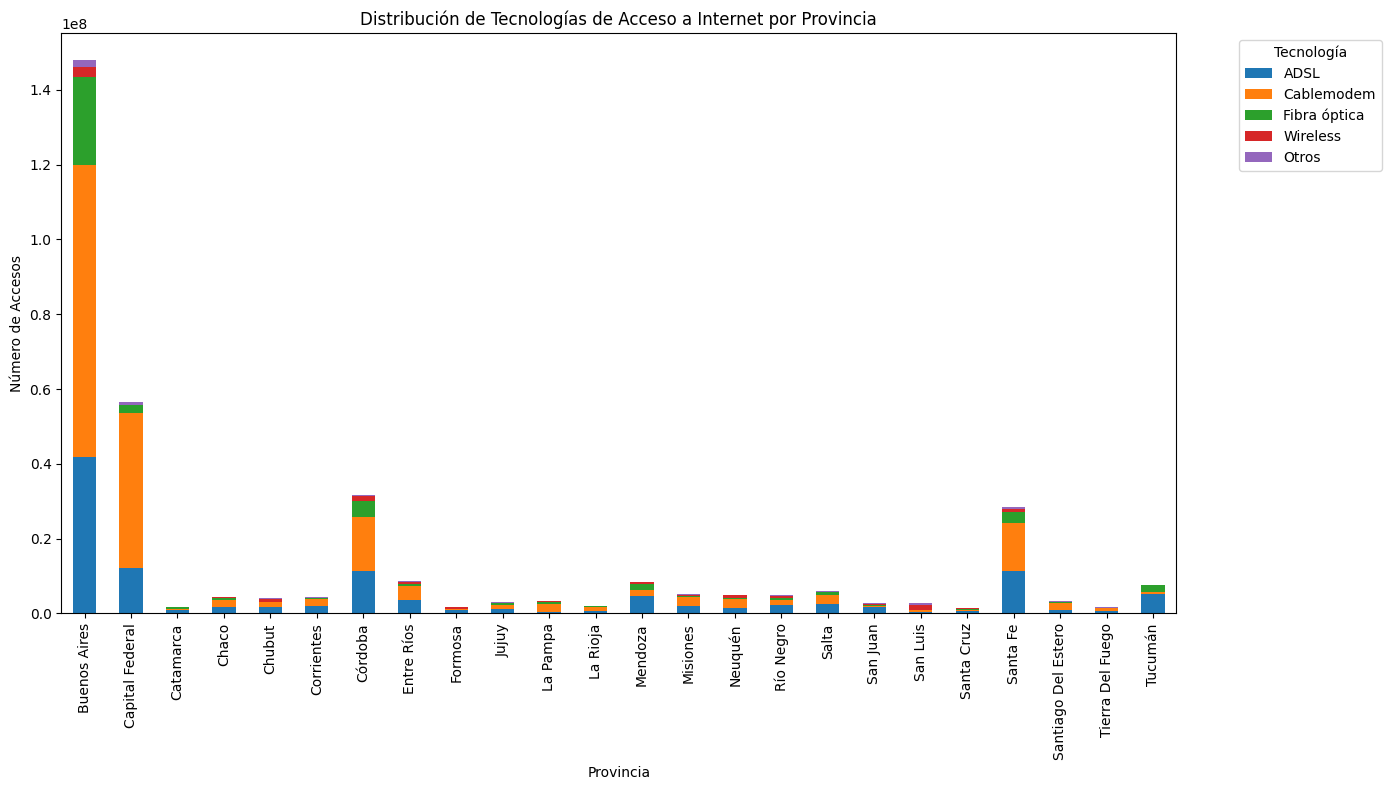

In [45]:
# GRÁFICO DE BARRAS APILADAS CON DISTRIBUCIÓN DE TECNOLOGÍAS POR PROVINCIA

# Agrupar por provincia y sumar los accesos en cada tecnología
df_grouped_t = df_accesos_por_t[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].groupby(df_accesos_por_t['Provincia']).sum()

# Crear el gráfico de barras apiladas
df_grouped_t.plot(kind='bar', stacked=True, figsize=(14, 8))

# Personalizar el gráfico
plt.title('Distribución de Tecnologías de Acceso a Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Accesos')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Con respecto a las tecnologías se puede observar el mismo comportamiento que se observa en cuanto a velocidades. La población de Buenos Aires y Capital Federal cumplen un rol importante en los valores anómalos asociados al número de accesos para las diferentes tecnologías, predominando "Cablemodem", ya expresado anteriormente.

**df_penetracion_hogares**

In [46]:
df_penetracion_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


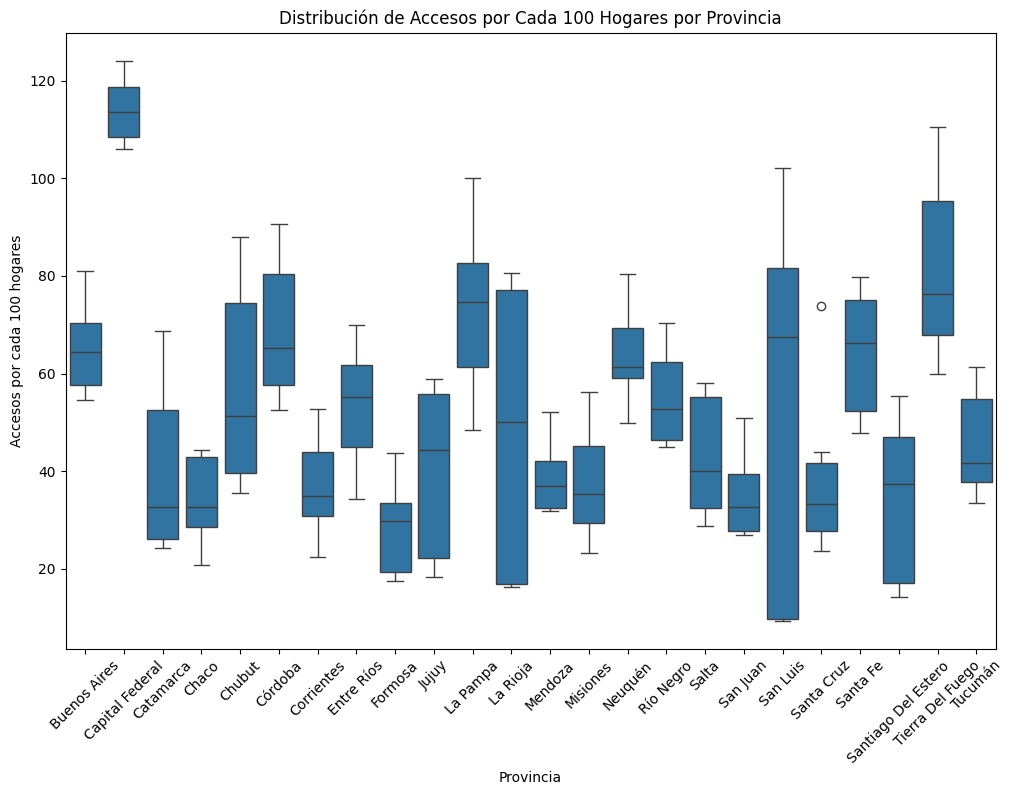

In [47]:
# Boxplot de Accesos por Cada 100 Hogares por Provincia

plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_penetracion_hogares)
plt.xticks(rotation=45)
plt.title('Distribución de Accesos por Cada 100 Hogares por Provincia')
plt.show()

Se observa un sólo valor outlier asociado a la provincia de Santa Cruz. Lo notable de este gráfico es la gran diferencia entre los accesos cada 100 hogares en Capital Federal con respecto al resto del país.

Esto posiblemente no sólo asociado a la densidad poblacional del sector, sino tambien a qué se trata de uno de los centros ecónomicos y financieros del país, por lo que el acceso a internet en indispensable para cierto tipo de negocios.

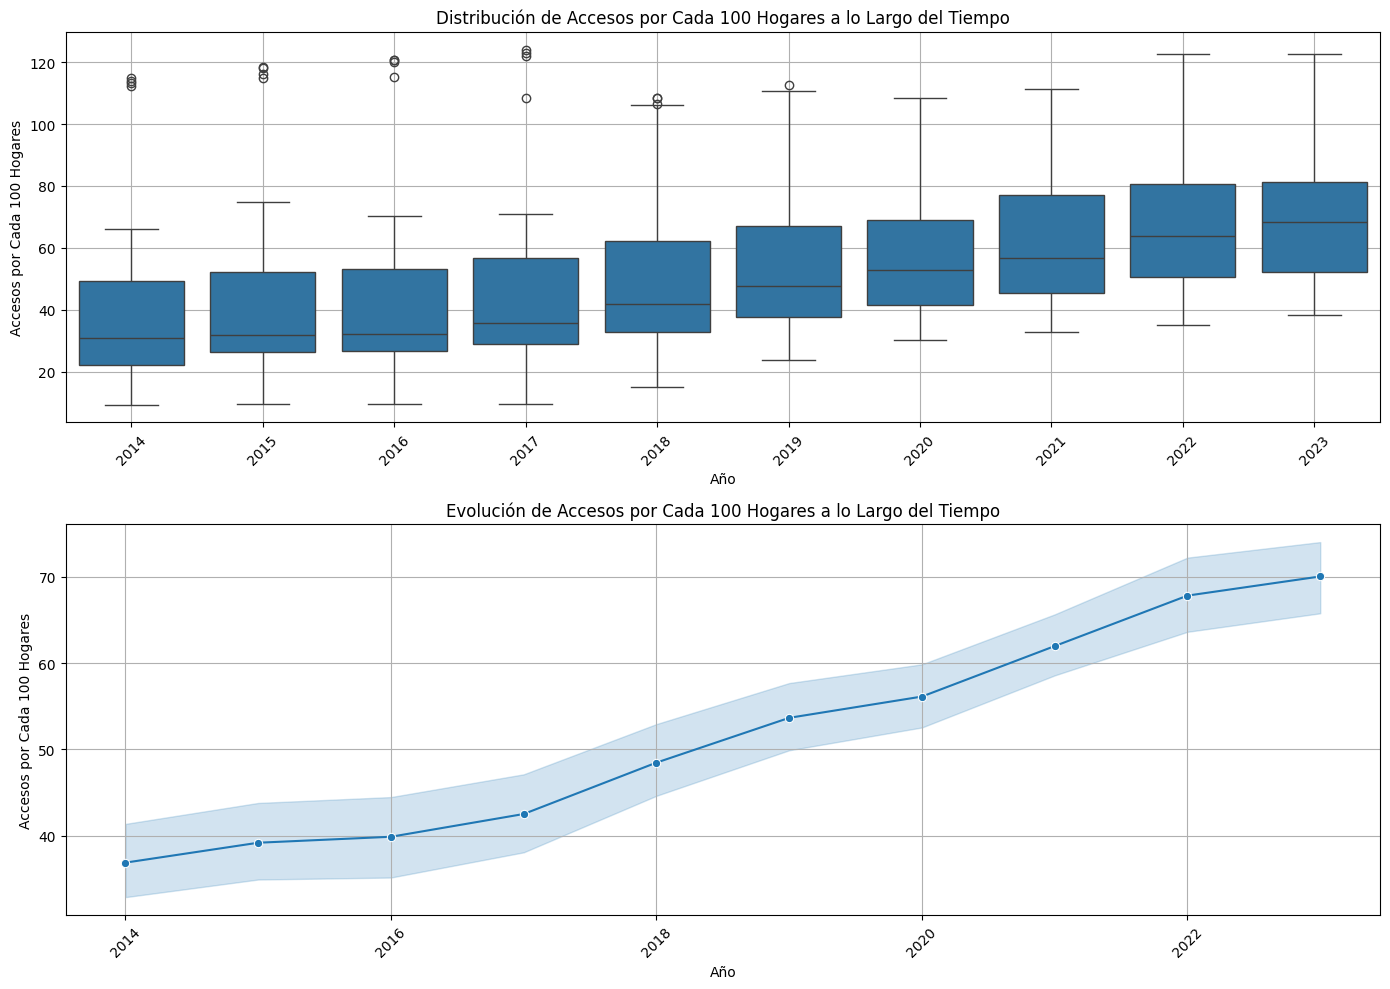

In [48]:
# BOXPLOT Y GRÁFICO DE LÍNEA PARA MOSTRAR DISTRIBUCIÓN Y EVOLUCIÓN RESPECTIVAMENTE DEL ACCESO POR CADA 100 HOGARES A LO LARGO DEL TIEMPO.
# Crear una figura con dos subgráficos
plt.figure(figsize=(14, 10))

# Primer subgráfico: Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_hogares)
plt.xticks(rotation=45)
plt.title('Distribución de Accesos por Cada 100 Hogares a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por Cada 100 Hogares')
plt.grid(True)

# Segundo subgráfico: Gráfico de Línea
plt.subplot(2, 1, 2)
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_hogares, marker='o')
plt.xticks(rotation=45)
plt.title('Evolución de Accesos por Cada 100 Hogares a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por Cada 100 Hogares')
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Si bien, en el gráfico superior, entre los años 2014 y 2019 se observa presencia de algunos valores anómalos, puede notarse que hacia los años posteriores esos valores que en un principio son considerados outliers, luego quedan incluídos en valores que se consideran normales o aceptables, esta tendencia posiblemente debida a un aumento en la penetración de internet en la sociedad.

El gráfico muestra una tendencia general de crecimiento en el número de accesos por cada 100 hogares a lo largo del tiempo. 

**df_penetracion_poblacion**

In [49]:
df_penetracion_poblacion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.394079
std,2.873778,1.118617,9.168959
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.750000,8.764189
50%,2018.500000,2.500000,13.417453
75%,2021.000000,3.250000,19.657928
max,2023.000000,4.000000,52.236739


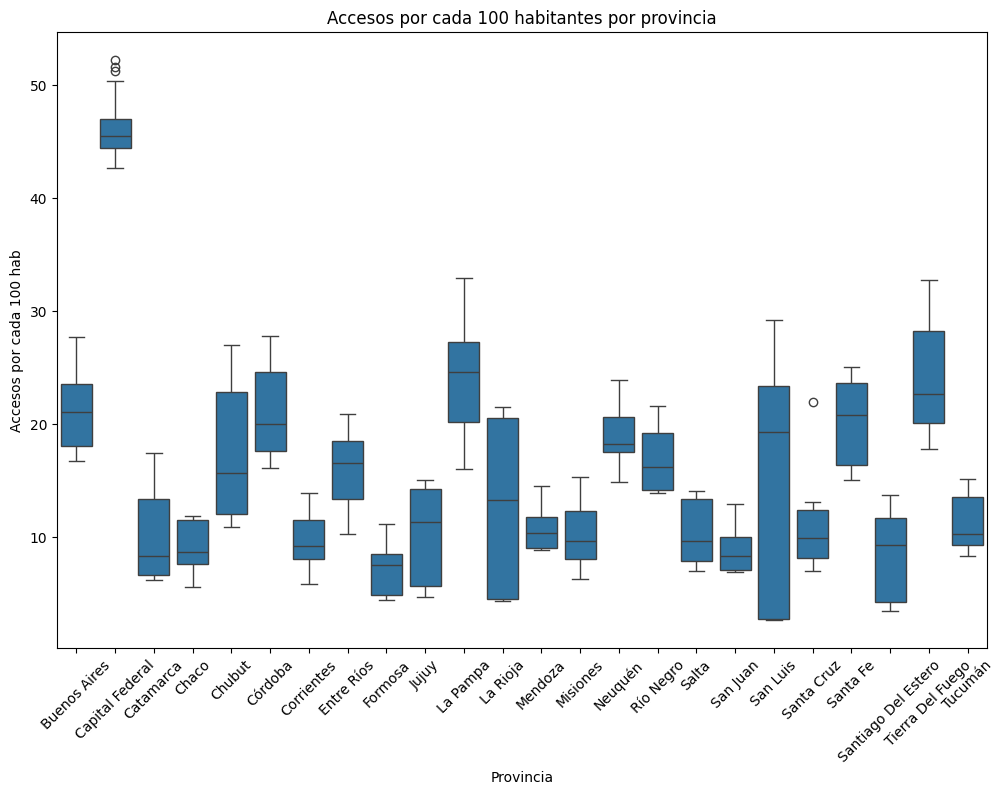

In [50]:
# Boxplots de accesos por cada 100 habitantes por provincia
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_penetracion_poblacion, x='Provincia', y='Accesos por cada 100 hab')
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=45)
plt.show()


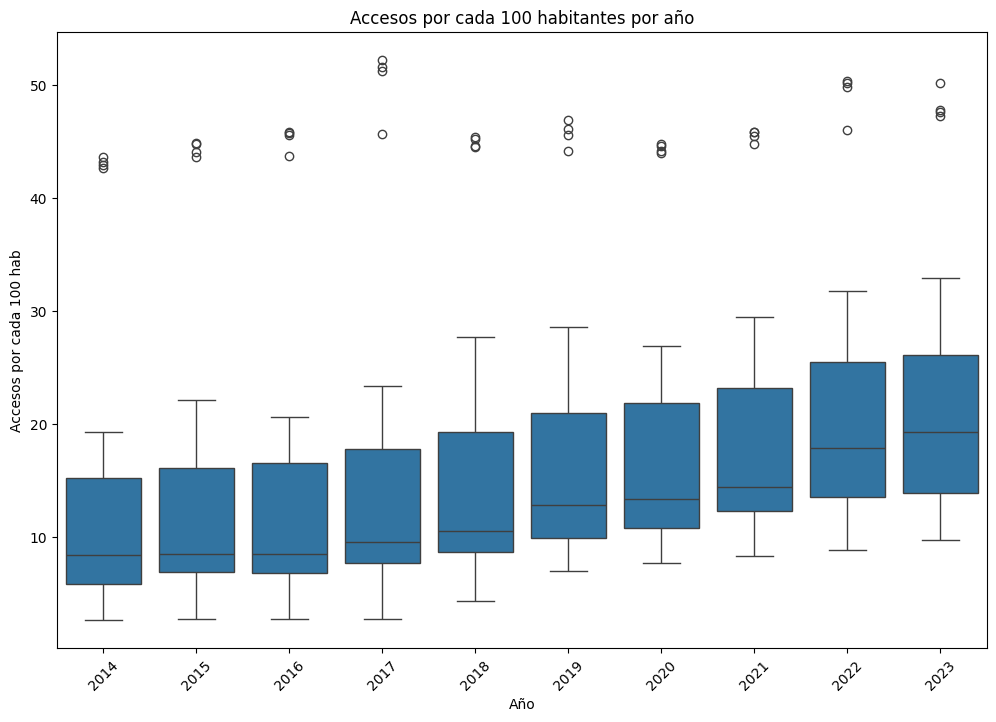

In [51]:
# Boxplots de accesos por cada 100 habitantes por año
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_penetracion_poblacion, x='Año', y='Accesos por cada 100 hab')
plt.title('Accesos por cada 100 habitantes por año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=45)
plt.show()


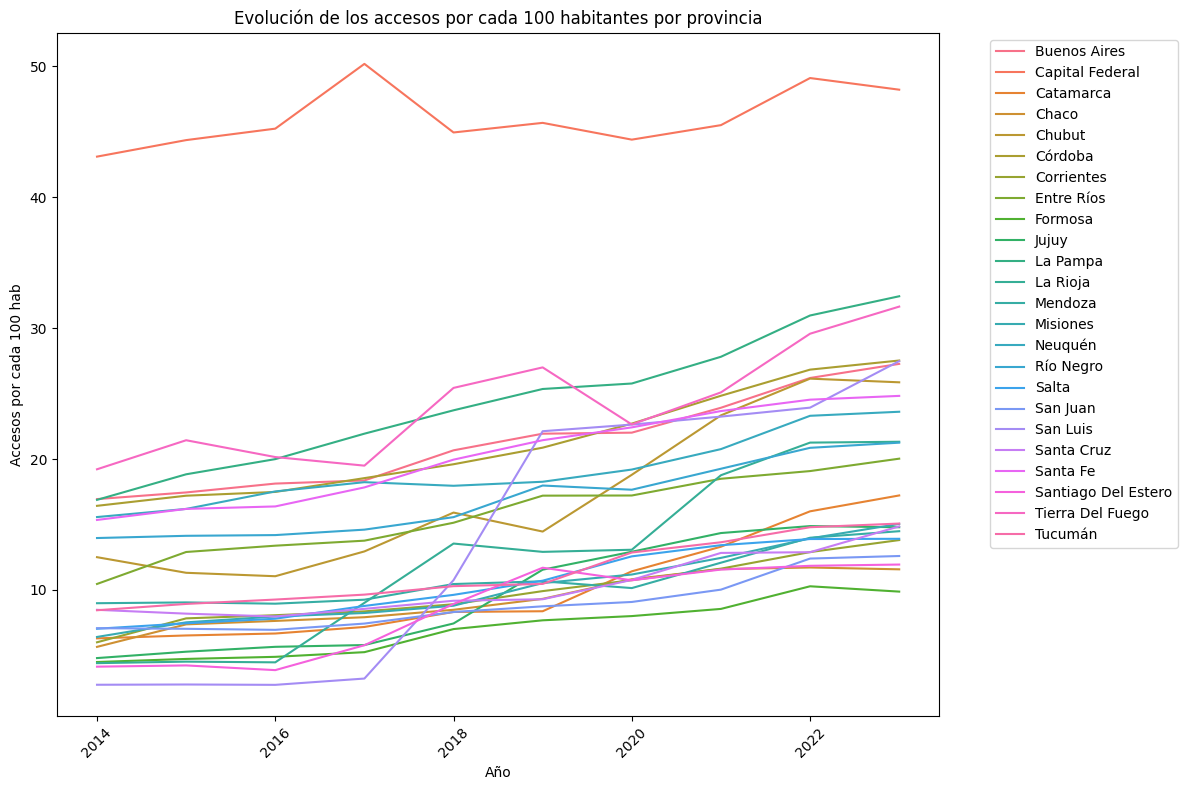

In [52]:
# Evolución de los accesos por cada 100 habitantes por provincia a través del tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_penetracion_poblacion, x='Año', y='Accesos por cada 100 hab', hue='Provincia', ci=None)
plt.title('Evolución de los accesos por cada 100 habitantes por provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Se puede observar la misma información expresada en los gráficos del dataframe anterior. En sí, se observa una clara diferencia en los accesos por población de Capital Federal con respecto a otros sectores del país. 
Si bien se observan outliers en los boxplots, tambien se observa una "cierta uniformidad" entre ellos, lo que indicaría una tendencia no tan anómala. 

Un detalle a observar es la fuerte crecida en los accesos en la provincia de San Luis para el año 2018, esto probablemente podría estar asociado a políticas gubernamentales que han impulsado el acceso a internet.

**df_penetracion_totales**

In [53]:
df_penetracion_totales.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,40.000000,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,62.436404,19.319330
std,2.908872,1.132277,9.563500,3.134956
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.636190,16.471345
50%,2018.500000,2.500000,61.947487,19.138953
75%,2021.000000,3.250000,69.574850,21.656592
max,2023.000000,4.000000,78.560000,24.660000


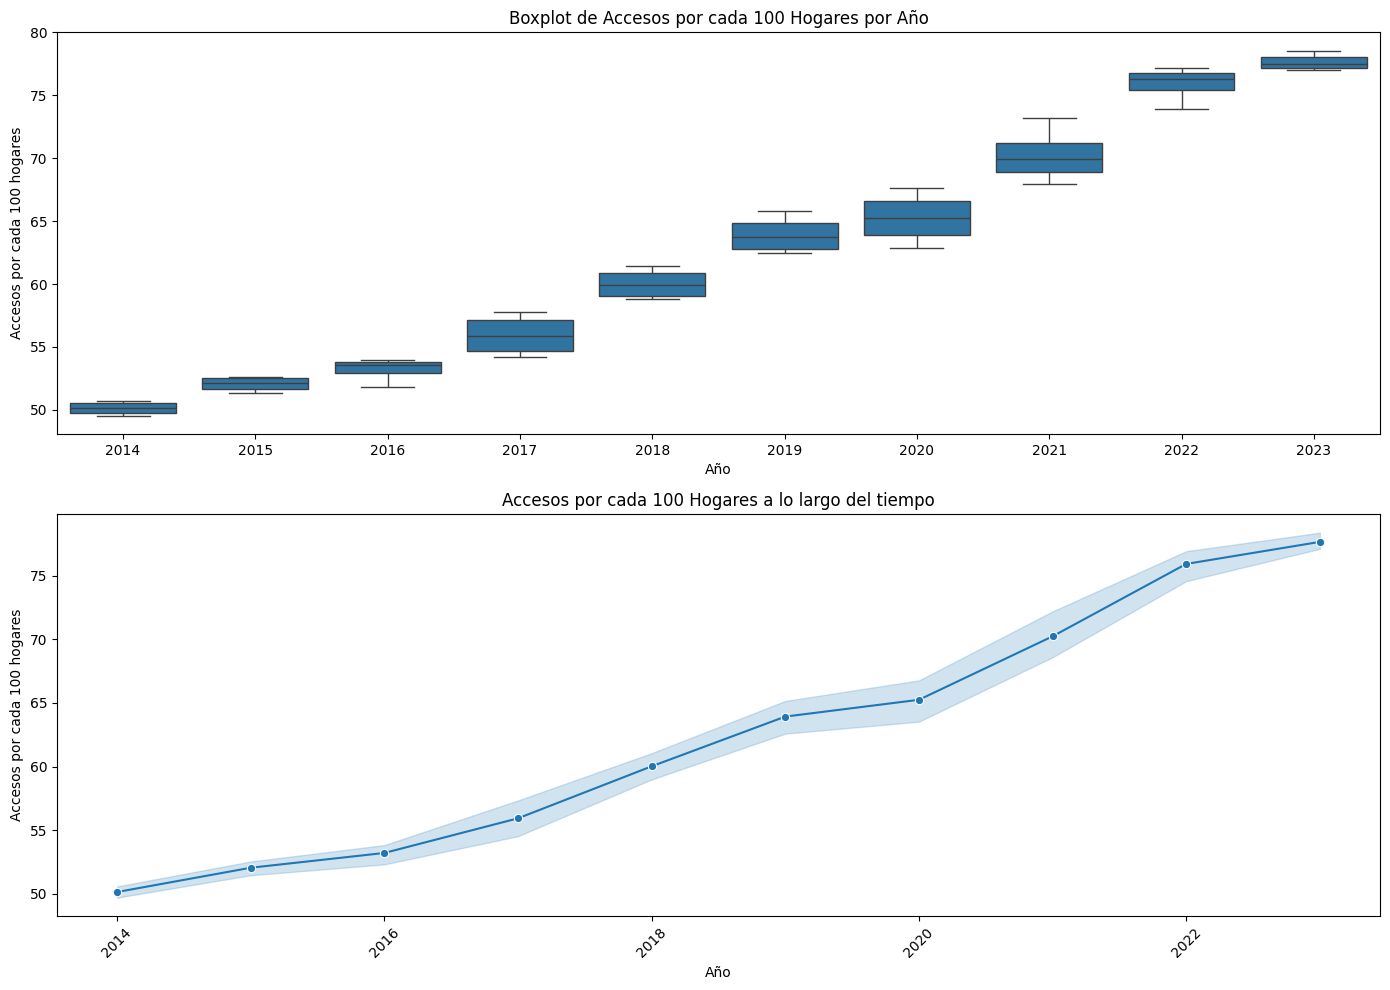

In [54]:
# BOXPLOT Y EVOLUCIÓN A TRAVÉS DEL TIEMPO DE ACCESOS PARA 100 HOGARES POR AÑO

# Crear subplots con 2 filas y 1 columna
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Primer subplot: Boxplot
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_totales, ax=ax1)
ax1.set_title('Boxplot de Accesos por cada 100 Hogares por Año')

# Segundo subplot: Gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_totales, marker='o', ax=ax2)
ax2.set_title('Accesos por cada 100 Hogares a lo largo del tiempo')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)  # Rotar etiquetas del eje x

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Tanto en los gráficos de accesos para 100 hogares (superior) como para cada 100 habitantes (inferior), en los boxplots no se observa la presencia de outliers al comparar la cantidad de accesos en los diferentes años.

Lo que si se observa es un aumento de los accesos a través de los años, notando una pendiente un tanto más pronunciada a partir del año 2020, posiblemente asociado a la pandemia de Coronavirus.

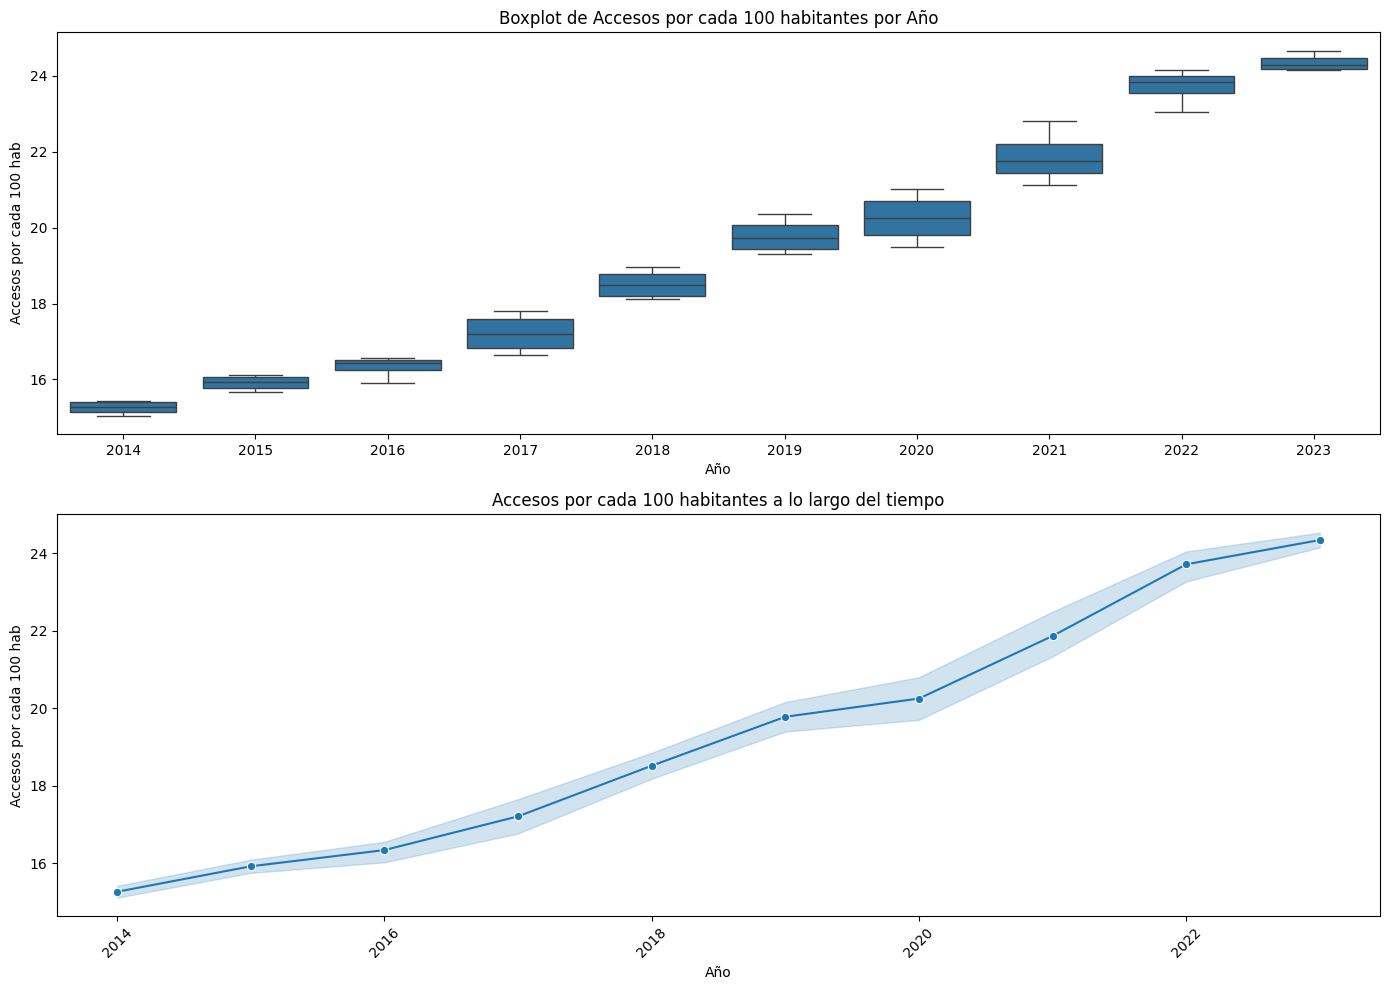

In [55]:
# BOXPLOT Y EVOLUCIÓN A TRAVÉS DEL TIEMPO DE ACCESOS PARA 100 HABITANTES POR AÑO

# Crear subplots con 2 filas y 1 columna
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Primer subplot: Boxplot
sns.boxplot(x='Año', y='Accesos por cada 100 hab', data=df_penetracion_totales, ax=ax1)
ax1.set_title('Boxplot de Accesos por cada 100 habitantes por Año')

# Segundo subplot: Gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df_penetracion_totales, marker='o', ax=ax2)
ax2.set_title('Accesos por cada 100 habitantes a lo largo del tiempo')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)  # Rotar etiquetas del eje x

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

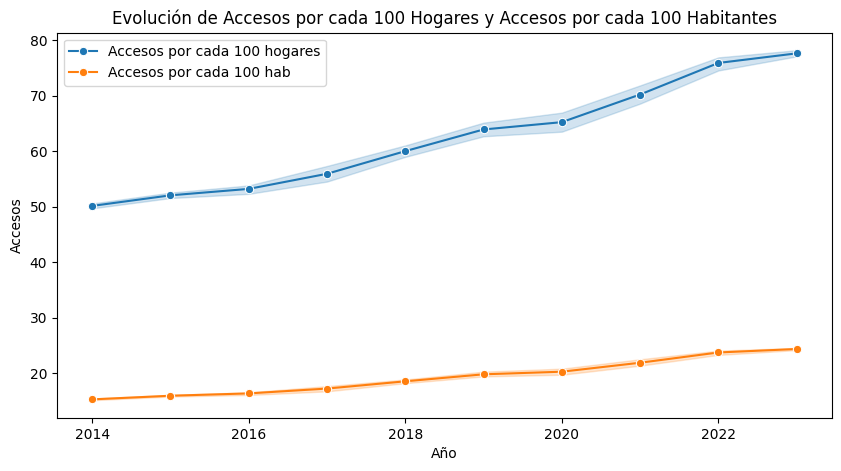

In [56]:
# GRÁFICO DE LÍNEAS PARA COMPARAR ACCESOS POR CADA 100 HOGARES Y ACCESOS POR CADA 100 HABITANTES
# Crear el gráfico de líneas
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_penetracion_totales, x='Año', y='Accesos por cada 100 hogares', label='Accesos por cada 100 hogares', marker='o')
sns.lineplot(data=df_penetracion_totales, x='Año', y='Accesos por cada 100 hab', label='Accesos por cada 100 hab', marker='o')

# Añadir etiquetas y título
plt.title('Evolución de Accesos por cada 100 Hogares y Accesos por cada 100 Habitantes')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend()
plt.show()

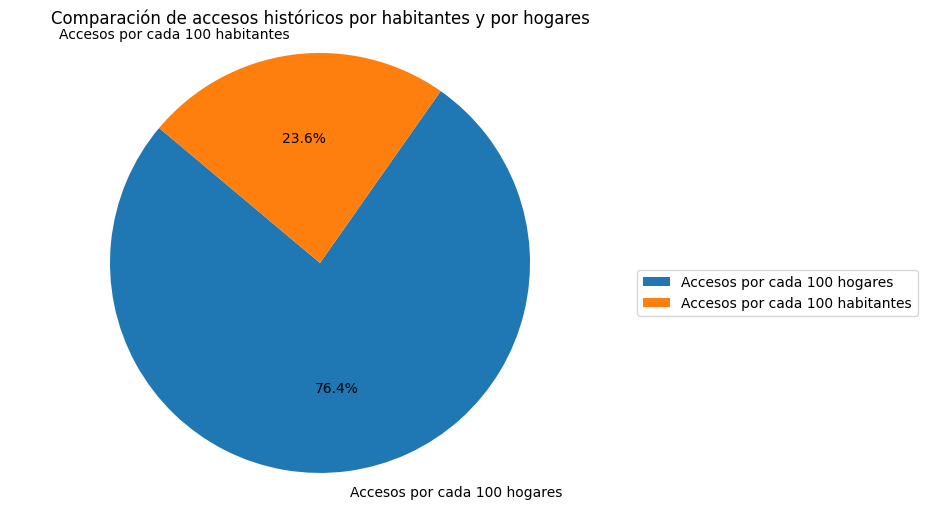

In [57]:
# COMPARACIÓN HISTÓRICA DEL TOTAL DE ACCESOS POR HABITANTES Y POR HOGARES.

# Suma total de accesos por cada 100 hogares y por cada 100 habitantes
suma_hogares = df_penetracion_totales['Accesos por cada 100 hogares'].sum()
suma_habitantes = df_penetracion_totales['Accesos por cada 100 hab'].sum()

# Crear un DataFrame para facilitar la visualización de los datos
df_suma = pd.DataFrame({
    'Accesos': [suma_hogares, suma_habitantes],
    'Categoría': ['Accesos por cada 100 hogares', 'Accesos por cada 100 habitantes']
})

# Configuración del gráfico
plt.figure(figsize=(8, 6))
plt.pie(df_suma['Accesos'], labels=df_suma['Categoría'], autopct='%1.1f%%', startangle=140)

# Configuraciones adicionales (título, etc.)
plt.title('Comparación de accesos históricos por habitantes y por hogares')
plt.axis('equal')  # Para que el gráfico de torta se vea como un círculo

# Agregar leyenda
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

Al comparar la evolución de los accesos a través de los años en ambas categorías (tanto según habitantes como por hogares), se observa una mayor cantidad de accesos y tambien un aumento más pronunciado en los mismos al tratarse de hogares. Esto tambien se representa al comparar la cantidad de accesos históricos por cada 100 hogares y cada 100 habitantes.

Esto posiblemente se deba al tipo de servicio que se está estudiando en este análisis, en este caso "Internet" el cual suele ser más contratado por hogares u oficinas.

En el siguiente gráfico, se busca mostrar una comparación dentro de cada año y por trimestre, de la cantidad de accesos tanto por hogar como por habitantes.

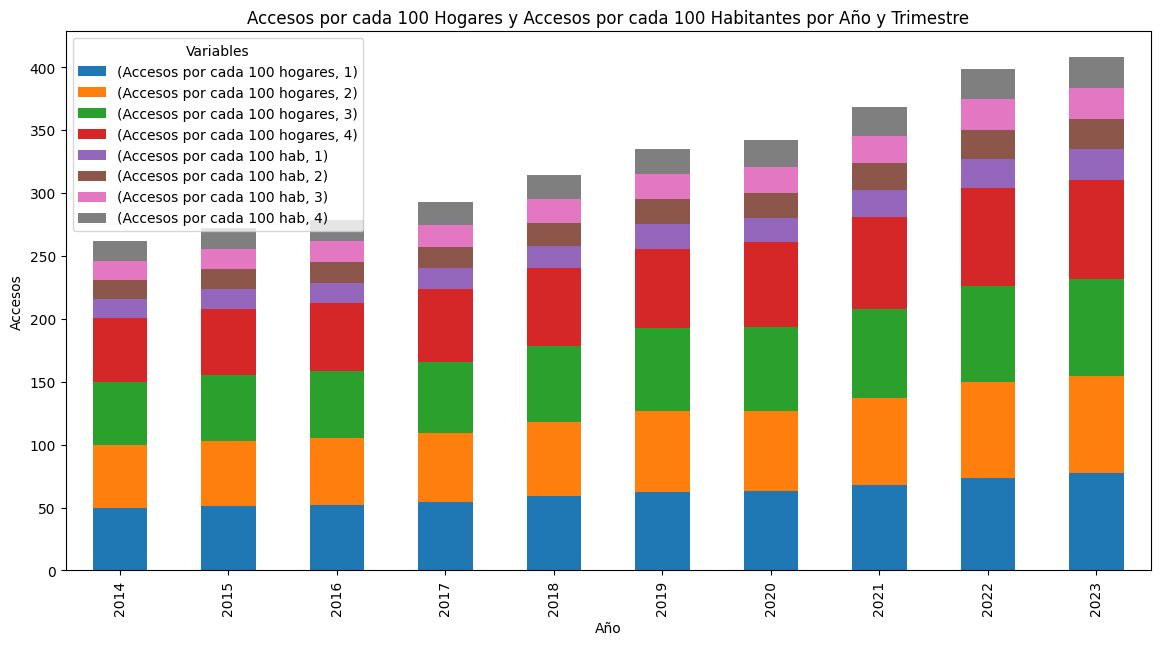

In [58]:
# GRÁFICO DE BARRAS APILADAS PARA COMPARAR ACCESOS POR HOGARES Y POR HABITANTES, POR TRIMESTRES A TRAVÉS DE LOS AÑOS
# Pivotar el dataframe para facilitar la creación del gráfico de barras apiladas
df_pivot = df_penetracion_totales.pivot(index='Año', columns='Trimestre', values=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'])

# Crear el gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 7))

# Añadir etiquetas y título
plt.title('Accesos por cada 100 Hogares y Accesos por cada 100 Habitantes por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend(title='Variables')
plt.show()

En general, se observa una tendencia de un aumento de los accesos a lo largo de los años. 

Por otro lado, se observa que las proporciones de cada uno de los trimestres, tanto cuando se observan hogares o habitantes, se mantienen constantes y bastante similares entre sí. O sea, se observa un crecimiento progresivo y proporcional en los distintos aspectos considerados.

**df_ingresos**

In [59]:
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,40.000000,40.000000,4.000000e+01
mean,2018.500000,2.500000,3.281153e+07
std,2.908872,1.132277,3.850304e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.817891e+06
50%,2018.500000,2.500000,1.842255e+07
75%,2021.000000,3.250000,3.942974e+07
max,2023.000000,4.000000,1.673760e+08


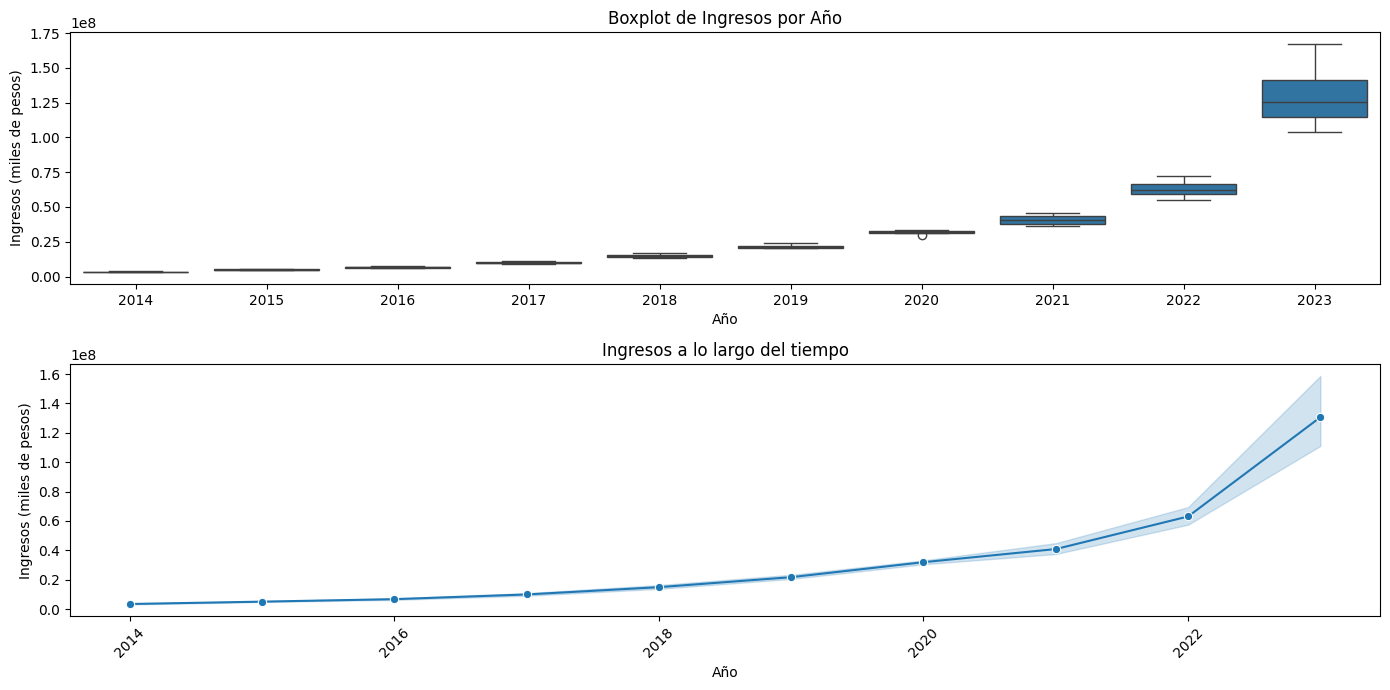

In [60]:
# BOXPLOT Y EVOLUCIÓN A TRAVÉS DEL TIEMPO DE INGRESOS POR AÑO

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))

# Boxplot para ingresos
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos, ax=ax1)
ax1.set_title('Boxplot de Ingresos por Año')

# Gráfico de líneas para ingresos
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos, marker='o', ax=ax2)
ax2.set_title('Ingresos a lo largo del tiempo')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Ajustes finales de la figura
plt.tight_layout()
plt.show()

Al observar estos gráficos de ingresos, se observa una tendencia de aumento. Si bien esta tendencia es coherente con respecto al aumento de accesos a servicios de internet, tambien podría estar relacionada con el aumento de la inflación en Argentina a través de los años teniendo en cuenta que los valores están registrados en miles de pesos argentinos. Se decide no incluir los ingresos en el presente análisis y se planea incluir en un estudio posterior para lograr la ponderación de ingresos con respecto a la inflación.

## DISCUSIONES Y PROPUESTAS DERIVADAS DEL EDA

A partir del análisis exploratorio de los dataframes elegidos se puede deducir que:

- Se observa el predominio de accesos entre dos rangos de velocidades de internet específicos: "+1 Mbps - + Mbps" y de "+ 30 Mbps". Estos accesos se concentran como es de esperarse en las provincias con mayor cantidad de habitantes como son: Buenos Aires, Córdoba y Santa Fe. 

A partir de esto se propone el siguiente KPI:

**Incrementar en un 2% los accesos totales al servicio de internet de velocidades entre "+ 20 Mbps - 30 Mbps" para el próximo trimestre por provincia**


- En cuanto a tecnologías, se observa una clara preferencia por parte de las grandes provincias como Buenos Aires, Córdoba y Santa Fe por el "Cablemodem". Una propuesta podría ser mejorar la infraestructura para hacer llegar tecnologías alternativas tales como fibra óptica.

A partir de esto se propone el siguiente KPI:

**Incrementar en un 2% el acceso a internet por fibra óptica para el próximo trimestre por provincia.**

- Al comparar la penetración del servicio de internet por hogares y por población, se observa una predominancia tanto de acceso y de evolución al trabajar con hogares. Esto se puede observar en los diversos gráficos, pero a su vez se intuye que en general un hogar incluye más de una persona, por lo que se estaría accediendo a más habitantes. 

A partir de esto se propone el siguiente KPI:

**Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia**


## CÁLCULOS DE KPI's

### KPI Acceso por Hogares


El primer KPI propuesto a calcular es:

**Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.**

La fórmula utilizada es la siguiente: KPI = ((nuevo_acceso - acceso_actual)/acceso_actual)*100

Donde:

"nuevo_acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.

"acceso_actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se agrega al dataframe df_penetracion_hogares dos nuevas columnas, una llamada "nuevo_acceso" que contiene la cantidad de accesos para 100 hogares del trimestre siguiente; y otra llamada "KPI", que contiene el valor dado por esta fórmula, de manera que el porcentaje de crecimiento del trimestre actual está dado en el registro del trimestre anterior. 


In [61]:
def calcular_kpi(acceso_actual, nuevo_acceso):
    #Aplicar la validación
    if acceso_actual != 0:
        return round((((nuevo_acceso - acceso_actual) / acceso_actual) * 100), 2)
    else:
        return 100  
df_penetracion_hogares = df_penetracion_hogares.sort_values(by=['Provincia', 'Año', 'Trimestre'])

In [62]:
df_penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
936,2014,1,Buenos Aires,54.570073
912,2014,2,Buenos Aires,55.061417
888,2014,3,Buenos Aires,56.754739
864,2014,4,Buenos Aires,56.094337
840,2015,1,Buenos Aires,56.370484
...,...,...,...,...
119,2022,4,Tucumán,61.040000
95,2023,1,Tucumán,60.340000
71,2023,2,Tucumán,60.750000
47,2023,3,Tucumán,61.260000


In [63]:
# Crear la nueva columna con el valor del trimestre siguiente (nuevo_acceso)
df_penetracion_hogares['nuevo_acceso'] = df_penetracion_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].shift(-1)

# Aplicar la fórmula del KPI usando los valores del trimestre siguiente
df_penetracion_hogares['KPI'] = df_penetracion_hogares.apply(lambda row: calcular_kpi(row['Accesos por cada 100 hogares'], row['nuevo_acceso']), axis=1)

# Llenar los valores NaN en 'nuevo_acceso' con 0. Será sólo el valor del último trimestre registrado.
df_penetracion_hogares['nuevo_acceso'] = df_penetracion_hogares['nuevo_acceso'].fillna(0)

# Llenar los valores NaN en 'KPI' con 0. Será sólo el valor del último trimestre.
df_penetracion_hogares['KPI'] = df_penetracion_hogares['KPI'].fillna(0)


In [64]:
# Se vuelve a ordenar el dataframe con los valores actuales a la vista.
df_penetracion_hogares = df_penetracion_hogares.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False])


Al volver a ordenar los datos, dejando las fechas más actuales al inicio, se puede observar que la métrica de la columna KPI asociada al trimestre número 4 del año 2023 es 0. Esto se debe a que todavia no se cuenta con la información del trimestre número 1 del año 2024.

Ya que el objetivo de este KPI es aumentar en un 2% el valor del trimestre 1 del 2024 con respecto al trimestre 4 del 2023, se realiza una ecuación para saber cuantos accesos nuevos se deberían lograr en el proximo trimestre cada 100 hogares y se la guarda en una nueva columna llamada "valor_objetivo".

In [65]:

# Definimos una función para aplicar la ecuación a cada fila
def calcular_valor_objetivo(row):
    return ((2/100) * row['Accesos por cada 100 hogares']) + row['Accesos por cada 100 hogares']

# Aplicamos la función a cada fila utilizando apply y axis=1 para aplicarlo por filas
df_penetracion_hogares['valor_objetivo'] = df_penetracion_hogares.apply(calcular_valor_objetivo, axis=1)

# Mostramos el dataframe actualizado
df_penetracion_hogares


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,nuevo_acceso,KPI,valor_objetivo
0,2023,4,Buenos Aires,80.960000,0.000000,0.00,82.579200
24,2023,3,Buenos Aires,80.640000,80.960000,0.40,82.252800
48,2023,2,Buenos Aires,79.670000,80.640000,1.22,81.263400
72,2023,1,Buenos Aires,79.000000,79.670000,0.85,80.580000
96,2022,4,Buenos Aires,78.940000,79.000000,0.08,80.518800
...,...,...,...,...,...,...,...
863,2015,1,Tucumán,35.078607,35.687706,1.74,35.780179
887,2014,4,Tucumán,35.320875,35.078607,-0.69,36.027293
911,2014,3,Tucumán,33.943756,35.320875,4.06,34.622631
935,2014,2,Tucumán,33.944527,33.943756,-0.00,34.623417


Estos valores objetivos, representan la cantidad de accesos por cada 100 hogares que deberían haberse logrado en los distintos trimestres para cumplir con el objetivo del aumento del 2%.

Con respecto al trimestre 4 del año 2023, en cada una de las provincias, el valor objetivo corresponde a la cantidad de nuevos accesos por cada 100 hogares, que se espera obtener en el trimestre siguiente para cumplir con sus objetivos.

Las propuestas para lograrlo son:

- Inversiones de infraestructura en provincias para mejorar tecnologías y velocidades.
- Promociones de ingreso a nuevos accesos.
- Marketing y publicidad.



## KPI Accesos fibra óptica

El segundo KPI propuesto a calcular es:

**Incrementar en un 2% el acceso a internet por fibra óptica para el próximo trimestre por provincia.**

La fórmula a utilizar es la misma, nada más que aplicada a otro dataframe: KPI = ((nuevo_acceso - acceso_actual)/acceso_actual)*100

Donde:

"nuevo_acceso" se refiere al número de accesos a internet a través de fibra óptica en el próximo trimestre.

"acceso_actual" se refiere al número de accesos a internet a través de fibra óptica en el trimestre actual.

Se agrega al dataframe df_accesos_por_t dos nuevas columnas, una llamada "nuevo_acceso" que contiene la cantidad de accesos para fibra óptica del trimestre siguiente; y otra llamada "KPI", que contiene el valor dado por esta fórmula, de manera que el porcentaje de crecimiento del trimestre actual está dado en el registro del trimestre anterior. 



In [66]:
# Antes de calcular se ordena el dataframe según años de manera ascendente.
df_accesos_por_t = df_accesos_por_t.sort_values(by=['Provincia', 'Año', 'Trimestre'])
df_accesos_por_t

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
936,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0
912,2014,2,Buenos Aires,1568881.0,1025490.0,120008.0,17020.0,33147.0,2764546.0
888,2014,3,Buenos Aires,1562533.0,1110628.0,124474.0,20049.0,31881.0,2849565.0
864,2014,4,Buenos Aires,1575978.0,1070135.0,120528.0,17728.0,32038.0,2816407.0
840,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0
...,...,...,...,...,...,...,...,...,...
119,2022,4,Tucumán,69441.0,20668.0,168717.0,4069.0,527.0,263422.0
95,2023,1,Tucumán,55822.0,19482.0,180976.0,4293.0,527.0,261100.0
71,2023,2,Tucumán,50019.0,20012.0,188986.0,4060.0,525.0,263602.0
47,2023,3,Tucumán,46348.0,20545.0,195053.0,4088.0,523.0,266557.0


In [67]:
# Crear la nueva columna con el valor del trimestre siguiente (nuevo_acceso)
df_accesos_por_t['nuevo_acceso'] = df_accesos_por_t.groupby('Provincia')['Fibra óptica'].shift(-1)

# Aplicar la fórmula del KPI usando los valores del trimestre siguiente
df_accesos_por_t['KPI'] = df_accesos_por_t.apply(lambda row: calcular_kpi(row['Fibra óptica'], row['nuevo_acceso']), axis=1)

# Llenar los valores NaN en 'nuevo_acceso' con 0. Será sólo el valor del último trimestre registrado.
df_accesos_por_t['nuevo_acceso'] = df_accesos_por_t['nuevo_acceso'].fillna(0)

# Llenar los valores NaN en 'KPI' con 0. Será sólo el valor del último trimestre.
df_accesos_por_t['KPI'] = df_accesos_por_t['KPI'].fillna(0)

In [68]:
# Se vuelve a ordenar el dataframe con los valores actuales a la vista.
df_accesos_por_t = df_accesos_por_t.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False])
df_accesos_por_t


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,nuevo_acceso,KPI
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,0.0,0.00
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0,1784593.0,2.55
48,2023,2,Buenos Aires,265537.0,2766463.0,1645945.0,138405.0,69138.0,4885488.0,1740239.0,5.73
72,2023,1,Buenos Aires,304583.0,2761043.0,1551074.0,132458.0,71770.0,4820928.0,1645945.0,6.12
96,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,1551074.0,3.46
...,...,...,...,...,...,...,...,...,...,...,...
863,2015,1,Tucumán,137857.0,115.0,116.0,88.0,100.0,138276.0,116.0,0.00
887,2014,4,Tucumán,137093.0,97.0,116.0,13.0,105.0,137424.0,116.0,0.00
911,2014,3,Tucumán,131739.0,97.0,117.0,13.0,100.0,132066.0,116.0,-0.85
935,2014,2,Tucumán,131740.0,97.0,121.0,13.0,98.0,132069.0,117.0,-3.31


Al volver a ordenar los datos, dejando las fechas más actuales al inicio, se puede observar que la métrica de la columna KPI asociada al trimestre número 4 del año 2023 es 0. Esto se debe a que todavia no se cuenta con la información del trimestre número 1 del año 2024.

Ya que el objetivo de este KPI es aumentar en un 2% minimamente el valor del trimestre 1 del 2024 con respecto al trimestre 4 del 2023, se realiza una ecuación para saber cuantos accesos nuevos a través de fibra óptica se deberían lograr en el proximo trimestre por provincia y se la guarda en una nueva columna llamada "valor_objetivo".

In [69]:

# Se define una función para aplicar la ecuación a cada fila
def valor_objetivo(row):
    return ((2/100) * row['Fibra óptica']) + row['Fibra óptica']

# Se aplica la función a cada fila utilizando apply y axis=1 para aplicarlo por filas
df_accesos_por_t['valor_objetivo'] = df_accesos_por_t.apply(valor_objetivo, axis=1)

# Mostramos el dataframe actualizado
df_accesos_por_t

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,nuevo_acceso,KPI,valor_objetivo
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0,0.0,0.00,1820284.86
24,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0,1784593.0,2.55,1775043.78
48,2023,2,Buenos Aires,265537.0,2766463.0,1645945.0,138405.0,69138.0,4885488.0,1740239.0,5.73,1678863.90
72,2023,1,Buenos Aires,304583.0,2761043.0,1551074.0,132458.0,71770.0,4820928.0,1645945.0,6.12,1582095.48
96,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,1551074.0,3.46,1529131.98
...,...,...,...,...,...,...,...,...,...,...,...,...
863,2015,1,Tucumán,137857.0,115.0,116.0,88.0,100.0,138276.0,116.0,0.00,118.32
887,2014,4,Tucumán,137093.0,97.0,116.0,13.0,105.0,137424.0,116.0,0.00,118.32
911,2014,3,Tucumán,131739.0,97.0,117.0,13.0,100.0,132066.0,116.0,-0.85,119.34
935,2014,2,Tucumán,131740.0,97.0,121.0,13.0,98.0,132069.0,117.0,-3.31,123.42


Estos valores objetivos, representan la cantidad de accesos a través de fibra óptica que deberían haberse logrado en los distintos trimestres para cumplir con el objetivo del aumento del 2%.

Con respecto al trimestre 4 del año 2023, en cada una de las provincias, el valor objetivo corresponde a la cantidad de nuevos accesos a través de fibra óptica, que se espera obtener en el trimestre siguiente para cumplir con sus objetivos.

Las propuestas para lograrlo son:

- Inversiones de infraestructura para fibra óptica en provincias.
- Promociones de ingreso a nuevos clientes de fibra óptica.
- Priorizar el crecimiento de infraestructuras en provincias que no lo tienen. Dejando un poco de lado Buenos Aires, Córdoba y Santa Fe.
- En Buenos Aires, Córdoba y Santa Fé, incrementar publicidad y marketing.

## KPI Acceso por velocidad media-alta

Si bien se observa un predominio de accesos entre dos rangos de velocidades de internet específicos: "+1 Mbps - + Mbps" y de "+ 30 Mbps", se propone aumentar los accesos en velocidades entre "+ 20 Mbps - 30 Mbps", ya que las mismas todavía presentan velocidades aceptables y podrían ser más accesibles economicamente a la población.

El tercer KPI propuesto a calcular es:

**Incrementar en un 2% los accesos totales al servicio de internet de velocidades entre "+ 20 Mbps - 30 Mbps" para el próximo trimestre por provincia**

La fórmula a utilizar es la misma, nada más que aplicada a otro dataframe: KPI = ((nuevo_acceso - acceso_actual)/acceso_actual)*100

Donde:

"nuevo_acceso" se refiere al número de accesos a internet con velocidades entre "+ 20 Mbps - 30 Mbps" en el próximo trimestre.

"acceso_actual" se refiere al número de accesos a internet con velocidades entre "+ 20 Mbps - 30 Mbps" en el trimestre actual.

Se agrega al dataframe df_accesos_por_v dos nuevas columnas, una llamada "nuevo_acceso" que contiene la cantidad de accesos con velocidades entre "+ 20 Mbps - 30 Mbps" del trimestre siguiente; y otra llamada "KPI", que contiene el valor dado por esta fórmula, de manera que el porcentaje de crecimiento del trimestre actual está dado en el registro del trimestre anterior. 



In [70]:
# Antes de calcular se ordena el dataframe según años de manera ascendente.
df_accesos_por_v = df_accesos_por_v.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Crear la nueva columna con el valor del trimestre siguiente (nuevo_acceso)
df_accesos_por_v['nuevo_acceso'] = df_accesos_por_v.groupby('Provincia')['+ 20 Mbps - 30 Mbps'].shift(-1)

# Aplicar la fórmula del KPI usando los valores del trimestre siguiente
df_accesos_por_v['KPI'] = df_accesos_por_v.apply(lambda row: calcular_kpi(row['+ 20 Mbps - 30 Mbps'], row['nuevo_acceso']), axis=1)

# Llenar los valores NaN en 'nuevo_acceso' con 0. Será sólo el valor del último trimestre registrado.
df_accesos_por_v['nuevo_acceso'] = df_accesos_por_v['nuevo_acceso'].fillna(0)

# Llenar los valores NaN en 'KPI' con 0. Será sólo el valor del último trimestre.
df_accesos_por_v['KPI'] = df_accesos_por_v['KPI'].fillna(0)


# Se vuelve a ordenar el dataframe con los valores actuales a la vista.
df_accesos_por_v = df_accesos_por_v.sort_values(by=['Provincia', 'Año', 'Trimestre'], ascending=[True, False, False])
df_accesos_por_v


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,nuevo_acceso,KPI
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0,0.0,0.00
24,2023,3,Buenos Aires,27440.0,24820.0,242010.0,241310.0,246076.0,112159.0,3951660.0,122762.0,4968237.0,110876.0,-1.14
48,2023,2,Buenos Aires,28007.0,24674.0,246067.0,253078.0,245505.0,107502.0,3883235.0,97420.0,4885488.0,112159.0,4.33
72,2023,1,Buenos Aires,28615.0,25137.0,249864.0,264388.0,241923.0,104495.0,3810940.0,95566.0,4820928.0,107502.0,2.88
96,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0,104495.0,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2015,1,Tucumán,107.0,27143.0,83895.0,23061.0,3722.0,334.0,0.0,0.0,138262.0,455.0,36.23
887,2014,4,Tucumán,17.0,28746.0,85091.0,20631.0,2733.0,196.0,0.0,0.0,137414.0,334.0,70.41
911,2014,3,Tucumán,6.0,32716.0,84668.0,14101.0,559.0,4.0,0.0,0.0,132054.0,196.0,4800.00
935,2014,2,Tucumán,6.0,32714.0,84675.0,14101.0,559.0,4.0,0.0,0.0,132059.0,4.0,0.00


Al volver a ordenar los datos, dejando las fechas más actuales al inicio, se puede observar que la métrica de la columna KPI asociada al trimestre número 4 del año 2023 es 0. Esto se debe a que todavia no se cuenta con la información del trimestre número 1 del año 2024.

Ya que el objetivo de este KPI es aumentar en un 2% minimamente el valor del trimestre 1 del 2024 con respecto al trimestre 4 del 2023, se realiza una ecuación para saber cuantos accesos nuevos con velocidades entre "+ 20 Mbps - 30 Mbps" se deberían lograr en el proximo trimestre por provincia y se la guarda en una nueva columna llamada "valor_objetivo".

In [71]:
# Se define una función para aplicar la ecuación a cada fila
def valor_objetivo(row):
    return ((2/100) * row['+ 20 Mbps - 30 Mbps']) + row['+ 20 Mbps - 30 Mbps']

# Se aplica la función a cada fila utilizando apply y axis=1 para aplicarlo por filas
df_accesos_por_v['valor_objetivo'] = df_accesos_por_v.apply(valor_objetivo, axis=1)

# Mostramos el dataframe actualizado
df_accesos_por_v

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,nuevo_acceso,KPI,valor_objetivo
0,2023,4,Buenos Aires,26909.0,23962.0,228393.0,239339.0,246144.0,110876.0,4042646.0,93351.0,5011620.0,0.0,0.00,113093.52
24,2023,3,Buenos Aires,27440.0,24820.0,242010.0,241310.0,246076.0,112159.0,3951660.0,122762.0,4968237.0,110876.0,-1.14,114402.18
48,2023,2,Buenos Aires,28007.0,24674.0,246067.0,253078.0,245505.0,107502.0,3883235.0,97420.0,4885488.0,112159.0,4.33,109652.04
72,2023,1,Buenos Aires,28615.0,25137.0,249864.0,264388.0,241923.0,104495.0,3810940.0,95566.0,4820928.0,107502.0,2.88,106584.90
96,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0,104495.0,5.90,100643.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2015,1,Tucumán,107.0,27143.0,83895.0,23061.0,3722.0,334.0,0.0,0.0,138262.0,455.0,36.23,340.68
887,2014,4,Tucumán,17.0,28746.0,85091.0,20631.0,2733.0,196.0,0.0,0.0,137414.0,334.0,70.41,199.92
911,2014,3,Tucumán,6.0,32716.0,84668.0,14101.0,559.0,4.0,0.0,0.0,132054.0,196.0,4800.00,4.08
935,2014,2,Tucumán,6.0,32714.0,84675.0,14101.0,559.0,4.0,0.0,0.0,132059.0,4.0,0.00,4.08


Estos valores objetivos, representan la cantidad de accesos deberían haberse logrado en los distintos trimestres para cumplir con el objetivo del aumento del 2%.

Con respecto al trimestre 4 del año 2023, en cada una de las provincias, el valor objetivo corresponde a la cantidad de nuevos accesos que se espera obtener en el trimestre siguiente para cumplir con sus objetivos.

Las propuestas para lograrlo son:

- Garantizar buen funcionamiento para ese rango de velocidad de servicio en provincias como Buenos Aires, Córdoba y Santa Fe.
- Promociones de ingreso a nuevos clientes en dicho rango de velocidad.
- Priorizar el crecimiento de infraestructuras en provincias del interior y extremos del país.
- Incrementar publicidad y marketing.

In [72]:
# Exportar dataframes necesarios a CSV para continuar el trabajo en Power BI

df_accesos_por_v.to_csv('accesos_por_v.csv', index=False)
df_accesos_por_t.to_csv('accesos_por_t.csv', index=False)


In [73]:
# Por problemas de lectura por parte de Power Bi, la tabla de penetración-hogares se exporta en formato excel.
df_penetracion_hogares.to_excel('penetracion_hogares.xlsx', sheet_name='Datos', index=False)
